In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# API Bağlantısının Yapılması

In [ ]:
#!pip install tweepy

In [ ]:
import tweepy, codecs

consumer_key = 'rbmsUiDIM9dXGdRKkn622DjdT'
consumer_secret = 'cA4lKHLWF7dBVrHDVWfG8JqPJdNQE6mDJXyXiqthPGYRacb0E4'
access_token = '2951885075-jmzsfnztlpPbdg0838DBNq7KpaHw29yXDG3rPch'
access_token_secret = 'ZxymkCGdmec272M2xWxW0jmMjzbjmBVAB5sxrCxgprahf'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
#api.update_status("Hello from Python for Udemy Data Science and Machine Learning Course")

# Twitter'dan Veri Çekmek

In [ ]:
mvk = api.me()

In [ ]:
mvk.screen_name

In [ ]:
mvk.followers_count

In [ ]:
mvk.friends

In [ ]:
for friend in mvk.friends(count = 20):
    print(friend.screen_name)

In [ ]:
dir(mvk)

In [ ]:
#kullanıcı temel bilgileri

In [ ]:
user = api.get_user(id = "murat_aksit")

In [ ]:
dir(user)

In [ ]:
user.screen_name

In [ ]:
user.followers_count

In [ ]:
?user

In [ ]:
dir(user)

In [ ]:
user.profile_image_url

In [ ]:
# hometimeline

In [ ]:
public_tweets = api.home_timeline(count = 10)

In [ ]:
public_tweets

In [ ]:
for tweet in public_tweets:
    print(tweet.text)

In [ ]:
#user timeline

In [ ]:
name = "murat_aksit"
tweet_count = 10

user_timetime = api.user_timeline(id = name, count = tweet_count)

for i in user_timetime:
    print(i.text)

In [ ]:
#retweet edilen tweetler

In [ ]:
retweets = api.retweets_of_me(count = 3)
for retweet in retweets:
    print(retweet.text)

In [ ]:
#hashtag

In [ ]:
results = api.search(q = "#pazartesi", 
                     lang = "tr", 
                     result_type = "recent", 
                     count = 100)

In [ ]:
results

In [ ]:
for retweet in results:
    print(retweet.text)

In [ ]:
#dataframe cevirmek

In [ ]:
def tweets_df(results):
    id_list = [tweet.id for tweet  in results]
    import pandas as pd
    data_set = pd.DataFrame(id_list, columns = ["id"])
    
    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]
    data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
    
    return data_set

In [ ]:
data = tweets_df(results)

In [ ]:
data["text"]

In [ ]:
data.to_csv("data_twitter.csv")

# Profil Analizi

In [ ]:
#temel bilgiler

In [ ]:
mvk = api.get_user("mvahitkeskin")

In [ ]:
mvk.name

In [ ]:
mvk.id

In [ ]:
mvk.url

In [ ]:
mvk.verified

In [ ]:
mvk.screen_name

In [ ]:
mvk.location

In [ ]:
mvk.statuses_count

In [ ]:
mvk.followers_count

In [ ]:
mvk.favourites_count

In [ ]:
mvk.friends_count

In [ ]:
tweets = api.user_timeline(id = "mvahitkeskin")

In [ ]:
for i in tweets:
    print(i.text)

In [ ]:
def timeline_df(tweets):
    idler = [tweet.id for tweet  in tweets]
    import pandas as pd
    df = pd.DataFrame(idler, columns = ["id"])
    
    df["created_at"] = [tweet.created_at for tweet in tweets]
    df["text"] = [tweet.text for tweet in tweets]
    df["favorite_count"] = [tweet.favorite_count for tweet in tweets]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweets]
    df["source"] = [tweet.source for kisi in tweets]
    
    return df

In [ ]:
timeline_df(tweets)

In [ ]:
def  timeline_df(tweets):
    import pandas as pd
    df = pd.DataFrame()
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['created_at'] = list(map(lambda tweet: tweet.created_at, tweets))
    df['text'] = list(map(lambda tweet: tweet.text, tweets))
    df['favorite_count'] = list(map(lambda tweet: tweet.favorite_count, tweets))
    df['retweet_count'] = list(map(lambda tweet: tweet.retweet_count, tweets))
    df['source'] = list(map(lambda tweet: tweet.source, tweets))
    return df

In [ ]:
tweets = api.user_timeline(id = "fatihportakal", count = 200)
df = timeline_df(tweets)

In [ ]:
?api.user_timeline

In [ ]:
?tweets

In [ ]:
df.shape

In [ ]:
df.head()

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("tweet_data.csv") # veri setini oku
df.head()

,Unnamed: 0,tweet_id,text,favorite_count,retweet_count,created_at
0,0,1302597759438995456,"@Trav_Roebuck It shouldn't be hard, General Jo...",0,0,Sun Sep 06 13:21:21 +0000 2020
1,1,1302597758432337920,RT @Alzhacker: https://t.co/e1z7SPtMDa\nCDC：CO...,0,13,Sun Sep 06 13:21:21 +0000 2020
2,2,1302597758382231553,RT @KarluskaP: World Bank Records COVID-19 Tes...,0,621,Sun Sep 06 13:21:21 +0000 2020
3,3,1302597757694357505,"RT @FacesOfCOVID: KEITH BROWN, 48, of Charlest...",0,118,Sun Sep 06 13:21:21 +0000 2020
4,4,1302597757413330946,"RT @doctormacias: Ahora que hay Covid-19, será...",0,431,Sun Sep 06 13:21:21 +0000 2020


In [6]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at
Unnamed: 0,,,,,
0,1302597759438995456,"@Trav_Roebuck It shouldn't be hard, General Jo...",0,0,Sun Sep 06 13:21:21 +0000 2020
1,1302597758432337920,RT @Alzhacker: https://t.co/e1z7SPtMDa\nCDC：CO...,0,13,Sun Sep 06 13:21:21 +0000 2020
2,1302597758382231553,RT @KarluskaP: World Bank Records COVID-19 Tes...,0,621,Sun Sep 06 13:21:21 +0000 2020
3,1302597757694357505,"RT @FacesOfCOVID: KEITH BROWN, 48, of Charlest...",0,118,Sun Sep 06 13:21:21 +0000 2020
4,1302597757413330946,"RT @doctormacias: Ahora que hay Covid-19, será...",0,431,Sun Sep 06 13:21:21 +0000 2020


In [7]:
df.index.name = None
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1302597759438995456,"@Trav_Roebuck It shouldn't be hard, General Jo...",0,0,Sun Sep 06 13:21:21 +0000 2020
1,1302597758432337920,RT @Alzhacker: https://t.co/e1z7SPtMDa\nCDC：CO...,0,13,Sun Sep 06 13:21:21 +0000 2020
2,1302597758382231553,RT @KarluskaP: World Bank Records COVID-19 Tes...,0,621,Sun Sep 06 13:21:21 +0000 2020
3,1302597757694357505,"RT @FacesOfCOVID: KEITH BROWN, 48, of Charlest...",0,118,Sun Sep 06 13:21:21 +0000 2020
4,1302597757413330946,"RT @doctormacias: Ahora que hay Covid-19, será...",0,431,Sun Sep 06 13:21:21 +0000 2020


In [8]:
#profil enleri

In [9]:
df.sort_values("favorite_count", ascending = False).head()

,tweet_id,text,favorite_count,retweet_count,created_at
1478,1302596989826281473,If you get sick while at a hotel🏨 or an 🛏️ acc...,16,8,Sun Sep 06 13:18:18 +0000 2020
634,1302597427606827008,ICYMI - CDC’s ‘Six Percent’? IT’S EVEN LESS — ...,12,8,Sun Sep 06 13:20:02 +0000 2020
615,1302597438524592129,"“Fofocar é uma praga pior do que covid-19”, di...",10,0,Sun Sep 06 13:20:05 +0000 2020
1371,1302597043546992645,Trump's amplification of the anti-science sent...,9,8,Sun Sep 06 13:18:30 +0000 2020
1005,1302597240163311617,COVID-19 RELATED SCAM: TWO (2) ARRESTED FOR DE...,8,3,Sun Sep 06 13:19:17 +0000 2020


In [10]:
df.sort_values("retweet_count", ascending = False)[["text","retweet_count"]].iloc[0:3]

,text,retweet_count
1101,RT @joshscampbell: One of the most important p...,43692
413,RT @joshscampbell: One of the most important p...,43692
1738,RT @joshscampbell: One of the most important p...,43692


In [11]:
df.sort_values("favorite_count", ascending = False)[["text","favorite_count"]].iloc[0:3]

,text,favorite_count
1478,If you get sick while at a hotel🏨 or an 🛏️ acc...,16
634,ICYMI - CDC’s ‘Six Percent’? IT’S EVEN LESS — ...,12
615,"“Fofocar é uma praga pior do que covid-19”, di...",10


## Retweet & Favori Sayılarının Dağılımlarının Çıkarılması

In [12]:
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 10.0)

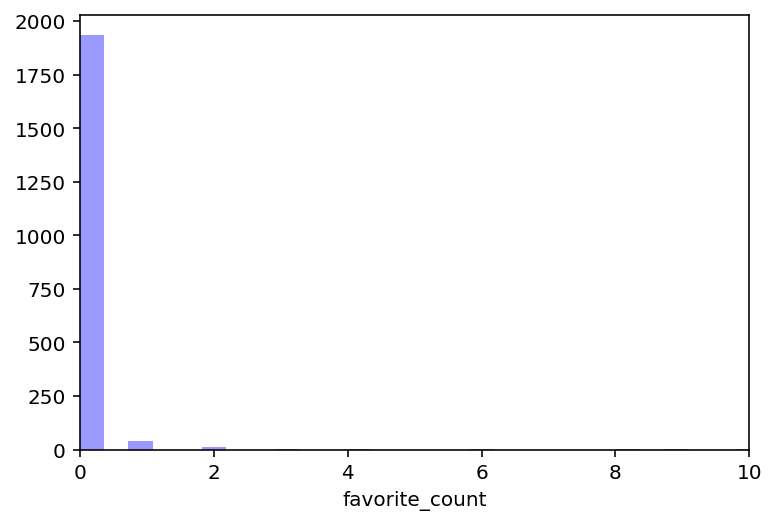

In [26]:
sns.distplot(df.favorite_count, kde = False, color = "blue");
plt.xlim(0, 10)

(-100.0, 10000.0)

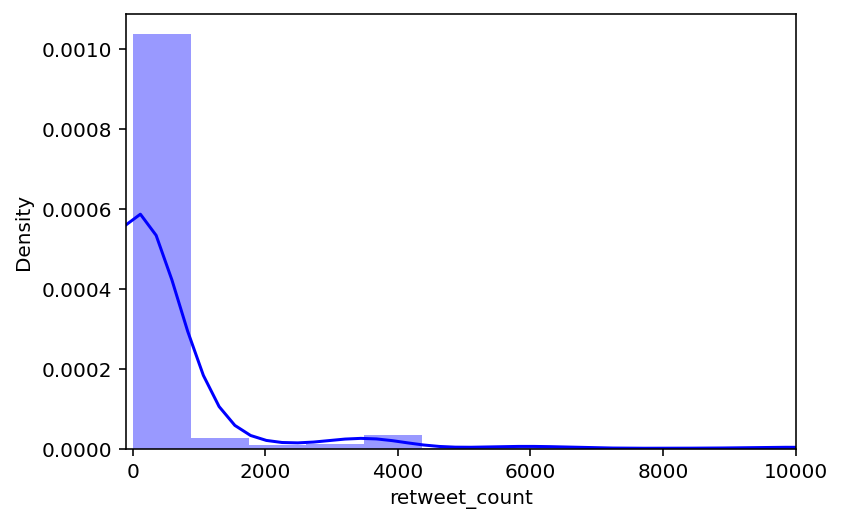

In [27]:
sns.distplot(df.retweet_count, color = "blue");
plt.xlim(-100, 10000)

## Tweet-Saat Dağılımı

In [28]:
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1302597759438995456,"@Trav_Roebuck It shouldn't be hard, General Jo...",0,0,Sun Sep 06 13:21:21 +0000 2020
1,1302597758432337920,RT @Alzhacker: https://t.co/e1z7SPtMDa\nCDC：CO...,0,13,Sun Sep 06 13:21:21 +0000 2020
2,1302597758382231553,RT @KarluskaP: World Bank Records COVID-19 Tes...,0,621,Sun Sep 06 13:21:21 +0000 2020
3,1302597757694357505,"RT @FacesOfCOVID: KEITH BROWN, 48, of Charlest...",0,118,Sun Sep 06 13:21:21 +0000 2020
4,1302597757413330946,"RT @doctormacias: Ahora que hay Covid-19, será...",0,431,Sun Sep 06 13:21:21 +0000 2020


In [33]:
df["created_at"] = pd.to_datetime(df["created_at"], format="%a %b %d %H:%M:%S %z %Y")
df["tweet_saati"] = df["created_at"].dt.strftime("%H")

In [34]:
# tweet saatlerini daha düzgün kesikli değişkene çevirdik
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at,tweet_saati
0,1302597759438995456,"@Trav_Roebuck It shouldn't be hard, General Jo...",0,0,2020-09-06 13:21:21+00:00,13
1,1302597758432337920,RT @Alzhacker: https://t.co/e1z7SPtMDa\nCDC：CO...,0,13,2020-09-06 13:21:21+00:00,13
2,1302597758382231553,RT @KarluskaP: World Bank Records COVID-19 Tes...,0,621,2020-09-06 13:21:21+00:00,13
3,1302597757694357505,"RT @FacesOfCOVID: KEITH BROWN, 48, of Charlest...",0,118,2020-09-06 13:21:21+00:00,13
4,1302597757413330946,"RT @doctormacias: Ahora que hay Covid-19, será...",0,431,2020-09-06 13:21:21+00:00,13


In [35]:
import pandas as pd
df["tweet_saati"] = pd.to_numeric(df["tweet_saati"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2000 non-null   int64              
 1   text            2000 non-null   object             
 2   favorite_count  2000 non-null   int64              
 3   retweet_count   2000 non-null   int64              
 4   created_at      2000 non-null   datetime64[ns, UTC]
 5   tweet_saati     2000 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(1)
memory usage: 109.4+ KB


C:\Users\skumsar\AppData\Local\anaconda3\envs\Python_ML_Udemy\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


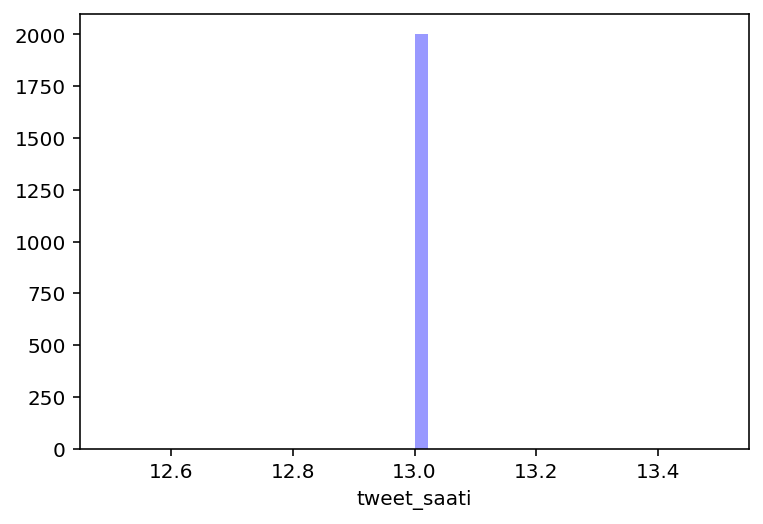

In [36]:
sns.distplot(df["tweet_saati"], kde = False, color ="blue");

In [38]:
#df["gunler"] = df["created_at"].dt.weekday_name
df["gunler"] = df["created_at"].dt.strftime("%A")

In [39]:
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at,tweet_saati,gunler
0,1302597759438995456,"@Trav_Roebuck It shouldn't be hard, General Jo...",0,0,2020-09-06 13:21:21+00:00,13,Sunday
1,1302597758432337920,RT @Alzhacker: https://t.co/e1z7SPtMDa\nCDC：CO...,0,13,2020-09-06 13:21:21+00:00,13,Sunday
2,1302597758382231553,RT @KarluskaP: World Bank Records COVID-19 Tes...,0,621,2020-09-06 13:21:21+00:00,13,Sunday
3,1302597757694357505,"RT @FacesOfCOVID: KEITH BROWN, 48, of Charlest...",0,118,2020-09-06 13:21:21+00:00,13,Sunday
4,1302597757413330946,"RT @doctormacias: Ahora que hay Covid-19, será...",0,431,2020-09-06 13:21:21+00:00,13,Sunday


In [41]:
df.groupby("gunler").count()["tweet_id"]

gunler
Sunday    2000
Name: tweet_id, dtype: int64

In [42]:
gun_freq = df.groupby("gunler").count()["tweet_id"]

<AxesSubplot:xlabel='gunler'>

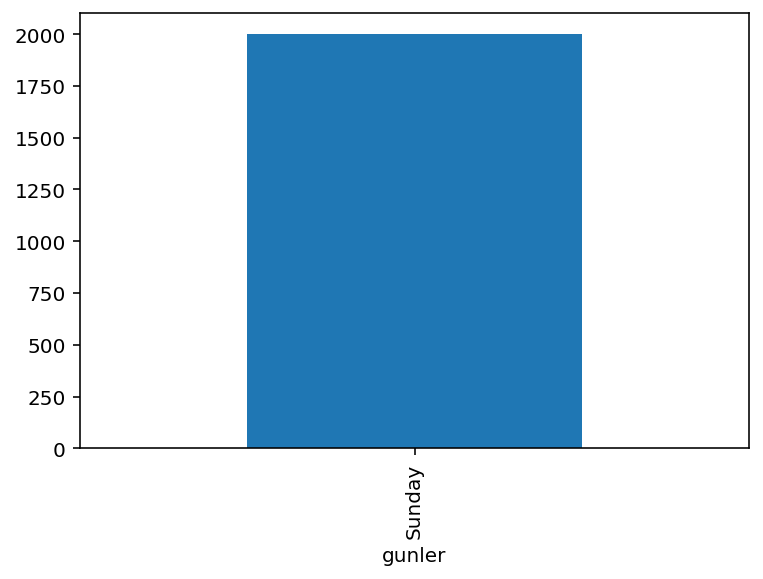

In [43]:
gun_freq.plot.bar(x = "gunler", y = "tweet_id")

Veri setimizde sadece pazar günü atılanlar olduğu için görselleştirmemiz sadece "Sunday" içerir. Source kaynağımız bulunmamaktadır.

## Tweet Atma Kaynaklarının Betimlenmesi

In [45]:
#kaynak_freq = df.groupby("source").count()["id"]

In [46]:
#kaynak_freq.plot.bar(x = "source", y = "id")

In [47]:
#df.groupby("source").count()["id"]

In [48]:
#df.groupby(["source","tweet_saati","gunler"])[["tweet_saati"]].count()

## Takipçi ve Arkadaşların Analizi

In [50]:
user = api.get_user(id = "fatihportakal")

In [ ]:
for friend in user.friends():
    print(friend.screen_name)

In [ ]:
friends = user.friends()
followers = user.followers()

In [ ]:
def followers_df(takipci):
    import pandas as pd
    idler = [kisi.id for kisi  in takipci]
    df = pd.DataFrame(idler, columns = ["id"])
    
    df["created_at"] = [kisi.created_at for kisi in takipci]
    df["screen_name"] = [kisi.screen_name for kisi in takipci]
    df["location"] = [kisi.location for kisi in takipci]
    df["followers_count"] = [kisi.followers_count for kisi in takipci]
    df["statuses_count"] = [kisi.statuses_count for kisi in takipci]
    df["friends_count"] = [kisi.friends_count for kisi in takipci]
    df["favourites_count"] = [kisi.favourites_count for kisi in takipci]
    
    return df

In [52]:
#df = followers_df(followers)

In [53]:
#df.head()

## Takipçi Segmentasyonu

In [ ]:
df.head()

In [ ]:
df.index = df["screen_name"]

In [ ]:
df.head()

In [ ]:
s_data = df[["followers_count", "statuses_count"]]

In [ ]:
s_data.info()

In [ ]:
s_data

In [ ]:
s_data["followers_count"] = s_data["followers_count"] + 0.01
s_data["statuses_count"] = s_data["statuses_count"] + 0.01

In [ ]:
s_data

In [ ]:
6.01 * 1.01 

In [ ]:
4.01 * 39.01

In [ ]:
3 * 0.01

In [ ]:
s_data = s_data.apply(lambda x: (x-min(x))/(max(x)-min(x)))

In [ ]:
s_data["followers_count"] = s_data["followers_count"] + 0.01
s_data["statuses_count"] = s_data["statuses_count"] + 0.01

In [ ]:
s_data.head()

In [ ]:
skor = s_data["followers_count"] * s_data["statuses_count"]

In [ ]:
skor

In [ ]:
skor.sort_values(ascending = False)

In [ ]:
skor[skor > skor.median() + skor.std()/len(skor)].sort_values(ascending = False)

In [ ]:
skor.std()

In [ ]:
skor.median()

In [ ]:
s_data["skor"] = skor

In [ ]:
s_data

In [ ]:
import numpy as np
s_data["segment"] = np.where(s_data["skor"] >= skor.median() + 
                             skor.std()/len(skor), "A","B")

In [ ]:
s_data

# Hashtag Analizi

In [ ]:
api.trends_available()

In [ ]:
def ulke_kodlari():
    places = api.trends_available()
    all_woeids = {place['name'].lower(): place['woeid'] for place in places}
    return all_woeids

In [ ]:
ulke_kodlari()

In [ ]:
def ulke_woeid(ulke_adi):
    ulke_adi = ulke_adi.lower()
    trends = api.trends_available()
    all_woeids = ulke_kodlari()
    return all_woeids[ulke_adi]
    

In [ ]:
23424969

In [ ]:
ulke_woeid("turkey")

In [ ]:
trendler = api.trends_place(id = 23424969)

In [ ]:
import json
print(json.dumps(trendler, indent = 4))

In [ ]:
turkiye = api.trends_place(id = 23424969)
trendler = turkiye[0]["trends"]

In [ ]:
for i in trendler:
    print(i["name"])

## Hashtag'den Veri Çekmek

In [ ]:
tweetler = api.search(q = "#pazartesi", 
                      lang = "tr", 
                      result_type = "recent", 
                     count = 1000)

In [ ]:
def hashtag_df(tweetler):
    import pandas as pd
    id_list = [tweet.id for tweet  in tweetler]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweetler]
    df["created_at"] = [tweet.created_at for tweet in tweetler]
    df["retweeted"] = [tweet.retweeted for tweet in tweetler]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweetler]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweetler]
    df["user_location"] = [tweet.author.location for tweet in tweetler]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweetler]
    
    return df

In [ ]:
df = hashtag_df(tweetler)

In [ ]:
df.shape

In [ ]:
df.head()

## Hashtag Betimlemek

In [ ]:
#essiz katılımcı

In [ ]:
df.head()

In [ ]:
df["user_screen_name"].unique().size

In [ ]:
df.groupby("user_screen_name")["id"].count().sum()

In [ ]:
#en cok katkı sağlayanlar

In [ ]:
df.groupby("user_screen_name").count()["id"].sort_values(ascending = False)[0:5]

In [ ]:
#ozgun katkı

In [ ]:
df.head()

In [ ]:
df["text"].str.startswith("RT").head(10)

In [ ]:
df[~df["text"].str.startswith("RT")].count()["id"] / len(df)

In [ ]:
df[~df["text"].str.startswith("RT")].count()["id"] / df[df["text"].str.startswith("RT")].count()["id"]

In [ ]:
## en cok fav-retweet

In [ ]:
df.sort_values("retweet_count", ascending = False).head()

## Tweet-Saat Dağılımı

In [ ]:
?api.search

In [ ]:
tweetler = api.search(q = "#datascience", lang = "en", count = 5000)

In [ ]:
def hashtag_df(tweetler):
    import pandas as pd
    id_list = [tweet.id for tweet  in tweetler]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweetler]
    df["created_at"] = [tweet.created_at for tweet in tweetler]
    df["retweeted"] = [tweet.retweeted for tweet in tweetler]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweetler]
    df["source"] = [tweet.source for tweet in tweetler]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweetler]
    df["user_location"] = [tweet.author.location for tweet in tweetler]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweetler]
    
    return df

In [ ]:
df = hashtag_df(tweetler)

In [ ]:
df.shape

In [ ]:
df["tweet_saati"] = df["created_at"].apply(lambda x: x.strftime("%H"))

In [ ]:
df.head()

In [ ]:
import pandas as pd
df["tweet_saati"] = pd.to_numeric(df["tweet_saati"])
df.info()

In [ ]:
sns.distplot(df["tweet_saati"], kde = False, color ="blue");

In [ ]:
df["gunler"] = df["created_at"].dt.weekday_name

In [ ]:
df.head()

In [ ]:
df.groupby("gunler").count()["id"]

In [ ]:
gun_freq = df.groupby("gunler").count()["id"]

In [ ]:
gun_freq.plot.bar(x = "gunler", y = "id")

## Tweet Atma Kaynaklarının Betimlenmesi

In [ ]:
kaynak_freq = df.groupby("source").count()["id"]

In [ ]:
kaynak_freq.plot.bar(x = "source", y = "id")

In [ ]:
df.groupby("source").count()["id"]

In [54]:
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at,tweet_saati,gunler
0,1302597759438995456,"@Trav_Roebuck It shouldn't be hard, General Jo...",0,0,2020-09-06 13:21:21+00:00,13,Sunday
1,1302597758432337920,RT @Alzhacker: https://t.co/e1z7SPtMDa\nCDC：CO...,0,13,2020-09-06 13:21:21+00:00,13,Sunday
2,1302597758382231553,RT @KarluskaP: World Bank Records COVID-19 Tes...,0,621,2020-09-06 13:21:21+00:00,13,Sunday
3,1302597757694357505,"RT @FacesOfCOVID: KEITH BROWN, 48, of Charlest...",0,118,2020-09-06 13:21:21+00:00,13,Sunday
4,1302597757413330946,"RT @doctormacias: Ahora que hay Covid-19, será...",0,431,2020-09-06 13:21:21+00:00,13,Sunday


# Twitter Text Mining

In [55]:
#df = hashtag_df(tweetler)

#buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]','')

#sayılar
df['text'] = df['text'].str.replace('\d','')

#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
from textblob import Word
#nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#noktalama işaretleri
df['text'] = df['text'].str.replace('rt','')

In [56]:
df["text"]

0       trav_roebuck shouldnt hard general john frewen...
1        alzhacker httpstcoezsptmda cdccovidの医療従事者の近くが...
2        karluskap world bank record covid test kit ex...
3        facesofcovid keith brown charleston south car...
4        doctormacias ahora que hay covid será de gran...
                              ...                        
1995     oregonian video claimed show antifa war camp ...
1996     jakpost jakaa cemetery space run covid burial...
1997     dondekojo president wedding pay aso villa cov...
1998    _realanna annietangent nycschools check suny o...
1999     cmdtemiliciab cumpliendo estrictamente los pr...
Name: text, Length: 2000, dtype: object

In [57]:
freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()

In [58]:
freq_df.columns = ["kelimeler","frekanslar"]

In [60]:
freq_df

,kelimeler,frekanslar
0,john,1.0
1,shouldnt,1.0
2,httpstcolbzwpkar,1.0
3,trav_roebuck,1.0
4,force,1.0
...,...,...
8998,firmes,1.0
8999,mantenemos,1.0
9000,establecidos,1.0
9001,cumpliendo,1.0


In [61]:
freq_df.shape

(9003, 2)

In [62]:
freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + 
        freq_df.frekanslar.std()]

# Anlamlı çıktı elde edebilmek için frekansların ort ve std ının toplamından yüksek değerleri alalım

,kelimeler,frekanslar
5,covid,1352.0
16,,1548.0
17,bank,30.0
18,kit,33.0
23,test,76.0
...,...,...
1407,su,29.0
1871,get,33.0
2009,last,30.0
2015,american,40.0


In [63]:
a = freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + 
        freq_df.frekanslar.std()]

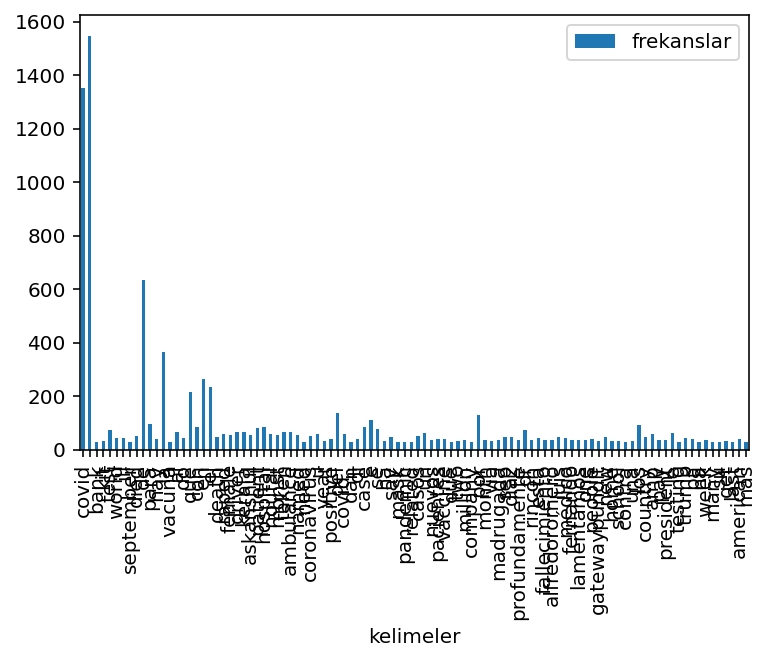

In [64]:
a.plot.bar(x = "kelimeler",y = "frekanslar");

En çok geçen kelimenin covid olduğu gözükmektedir.

## Word cloud

In [65]:
#!pip install wordcloud

In [66]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [67]:
text = " ".join(i for i in df.text)

In [70]:
text

'trav_roebuck shouldnt hard general john frewen commander covid task force also httpstcolbzwpkar  alzhacker httpstcoezsptmda cdccovidの医療従事者の近くがcovidに感染したことを知らなかった 研究者は無症候性のままであった医師看護師医師の助手が患者や同僚に知らず知らずのうちに感染を広げ  karluskap world bank record covid test kit expoed national file themoreyouknow httpstcocqdlvpuilv  facesofcovid keith brown charleston south carolina died covid september devoted emt took ill th  doctormacias ahora que hay covid será de gran impoancia la vacuna de influenza para evitar do epidemias al mismo tiempo vacúna  damasogarciav ojo focop movin con años de venganza varelista fue suficiente suficiente con el covid para tener al pais en v merrichristi nousername thetweetofgod read well httpstcovmwxkkot tweetasinbeer cedivadova thehill yes agreed fact appears undercounting covid death over httpstcozkwrorby  askanshul female covid patient raped ambulance driver named noufal taken hospital kerala monst  askanshul female covid patient raped ambulance driver named noufal taken 

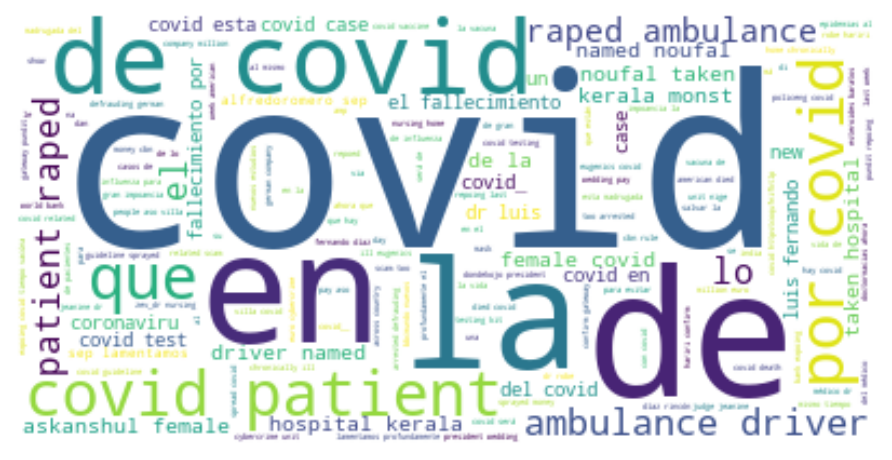

In [71]:
wordcloud = WordCloud(background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [72]:
vbo_mask = np.array(Image.open("VBO.jpg")) #şablon ekle

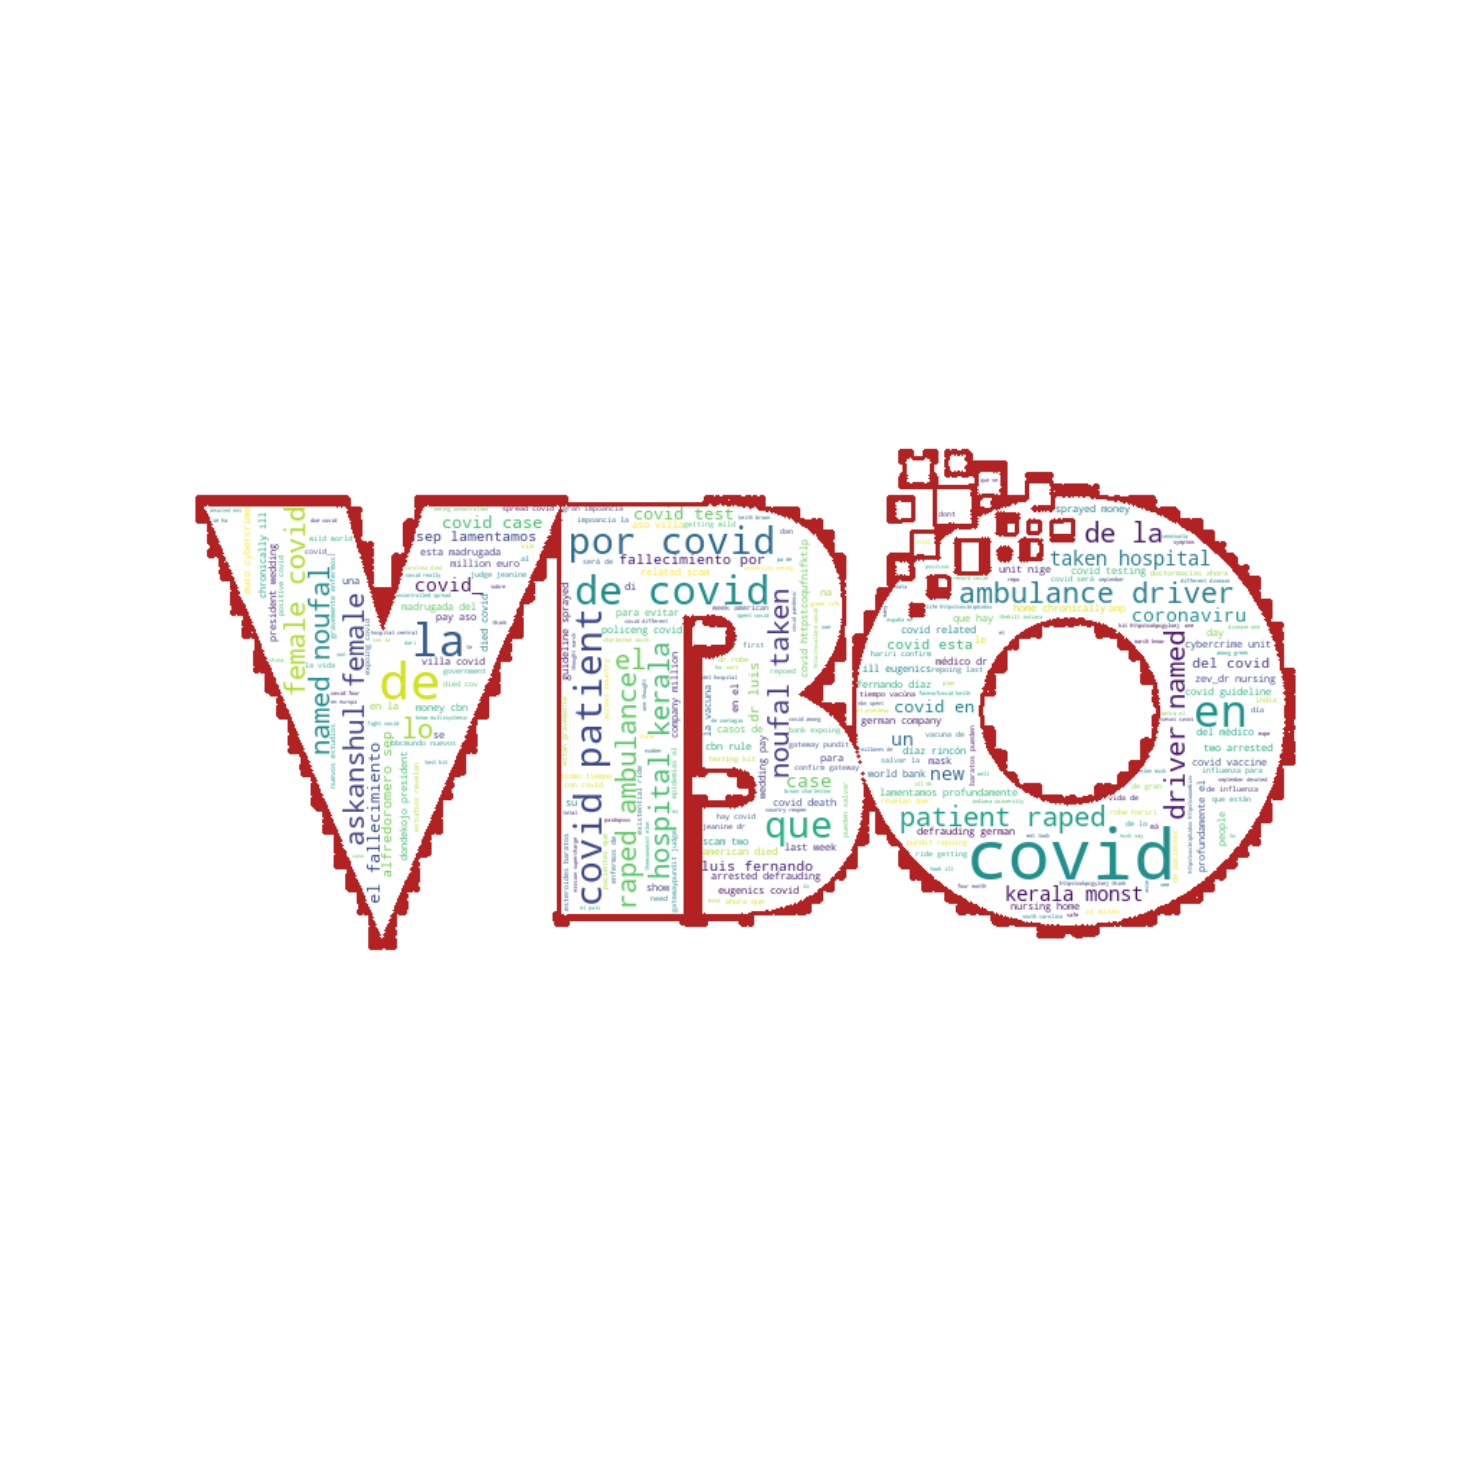

In [76]:
wc = WordCloud(background_color = "white", 
               max_words = 1000, 
               mask = vbo_mask, # şablon
              contour_width = 3, 
              contour_color = "firebrick")

wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Twitter Sentiment Analizi

In [77]:
df

,tweet_id,text,favorite_count,retweet_count,created_at,tweet_saati,gunler
0,1302597759438995456,trav_roebuck shouldnt hard general john frewen...,0,0,2020-09-06 13:21:21+00:00,13,Sunday
1,1302597758432337920,alzhacker httpstcoezsptmda cdccovidの医療従事者の近くが...,0,13,2020-09-06 13:21:21+00:00,13,Sunday
2,1302597758382231553,karluskap world bank record covid test kit ex...,0,621,2020-09-06 13:21:21+00:00,13,Sunday
3,1302597757694357505,facesofcovid keith brown charleston south car...,0,118,2020-09-06 13:21:21+00:00,13,Sunday
4,1302597757413330946,doctormacias ahora que hay covid será de gran...,0,431,2020-09-06 13:21:21+00:00,13,Sunday
...,...,...,...,...,...,...,...
1995,1302596718475776000,oregonian video claimed show antifa war camp ...,0,194,2020-09-06 13:17:13+00:00,13,Sunday
1996,1302596717204840448,jakpost jakaa cemetery space run covid burial...,0,58,2020-09-06 13:17:13+00:00,13,Sunday
1997,1302596717163040769,dondekojo president wedding pay aso villa cov...,0,814,2020-09-06 13:17:13+00:00,13,Sunday
1998,1302596716500332545,_realanna annietangent nycschools check suny o...,0,0,2020-09-06 13:17:12+00:00,13,Sunday


In [78]:
from textblob import TextBlob

Score için model daha önce hazırlamıştık. Modelimizi yazalım.

In [79]:
def sentiment_skorla(df):

    text = df["text"]

    for i in range(0,len(text)):
        textB = TextBlob(text[i])
        sentiment_skoru = textB.sentiment.polarity
        df.set_value(i, 'sentiment_skoru', sentiment_skoru)
        
        if sentiment_skoru <0.00:
            duygu_sinifi = 'Negatif'
            df.set_value(i, 'duygu_sinifi', duygu_sinifi )

        elif sentiment_skoru >0.00:
            duygu_sinifi = 'Pozitif'
            df.set_value(i, 'duygu_sinifi', duygu_sinifi )

        else:
            duygu_sinifi = 'Notr'
            df.set_value(i, 'duygu_sinifi', duygu_sinifi )
            
    return df 

In [80]:
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at,tweet_saati,gunler
0,1302597759438995456,trav_roebuck shouldnt hard general john frewen...,0,0,2020-09-06 13:21:21+00:00,13,Sunday
1,1302597758432337920,alzhacker httpstcoezsptmda cdccovidの医療従事者の近くが...,0,13,2020-09-06 13:21:21+00:00,13,Sunday
2,1302597758382231553,karluskap world bank record covid test kit ex...,0,621,2020-09-06 13:21:21+00:00,13,Sunday
3,1302597757694357505,facesofcovid keith brown charleston south car...,0,118,2020-09-06 13:21:21+00:00,13,Sunday
4,1302597757413330946,doctormacias ahora que hay covid será de gran...,0,431,2020-09-06 13:21:21+00:00,13,Sunday


In [88]:
def sentiment_skorla(df):
    for i in range(len(df)):
        textB = TextBlob(df.at[i, 'text'])
        sentiment_skoru = textB.sentiment.polarity
        df.at[i, 'sentiment_skoru'] = sentiment_skoru
        
        if sentiment_skoru < 0.00:
            duygu_sinifi = 'Negatif'
        elif sentiment_skoru > 0.00:
            duygu_sinifi = 'Pozitif'
        else:
            duygu_sinifi = 'Notr'
        
        df.at[i, 'duygu_sinifi'] = duygu_sinifi
    
    return df

In [89]:
sentiment_skorla(df) # modeli çalıştır

,tweet_id,text,favorite_count,retweet_count,created_at,tweet_saati,gunler,sentiment_skoru,duygu_sinifi
0,1302597759438995456,trav_roebuck shouldnt hard general john frewen...,0,0,2020-09-06 13:21:21+00:00,13,Sunday,-0.120833,Negatif
1,1302597758432337920,alzhacker httpstcoezsptmda cdccovidの医療従事者の近くが...,0,13,2020-09-06 13:21:21+00:00,13,Sunday,0.000000,Notr
2,1302597758382231553,karluskap world bank record covid test kit ex...,0,621,2020-09-06 13:21:21+00:00,13,Sunday,0.000000,Notr
3,1302597757694357505,facesofcovid keith brown charleston south car...,0,118,2020-09-06 13:21:21+00:00,13,Sunday,-0.500000,Negatif
4,1302597757413330946,doctormacias ahora que hay covid será de gran...,0,431,2020-09-06 13:21:21+00:00,13,Sunday,0.000000,Notr
...,...,...,...,...,...,...,...,...,...
1995,1302596718475776000,oregonian video claimed show antifa war camp ...,0,194,2020-09-06 13:17:13+00:00,13,Sunday,0.000000,Notr
1996,1302596717204840448,jakpost jakaa cemetery space run covid burial...,0,58,2020-09-06 13:17:13+00:00,13,Sunday,0.000000,Notr
1997,1302596717163040769,dondekojo president wedding pay aso villa cov...,0,814,2020-09-06 13:17:13+00:00,13,Sunday,0.000000,Notr
1998,1302596716500332545,_realanna annietangent nycschools check suny o...,0,0,2020-09-06 13:17:12+00:00,13,Sunday,0.000000,Notr


In [90]:
df.groupby("duygu_sinifi").count()["tweet_id"]

duygu_sinifi
Negatif     259
Notr       1378
Pozitif     363
Name: tweet_id, dtype: int64

In [91]:
duygu_freq = df.groupby("duygu_sinifi").count()["tweet_id"]

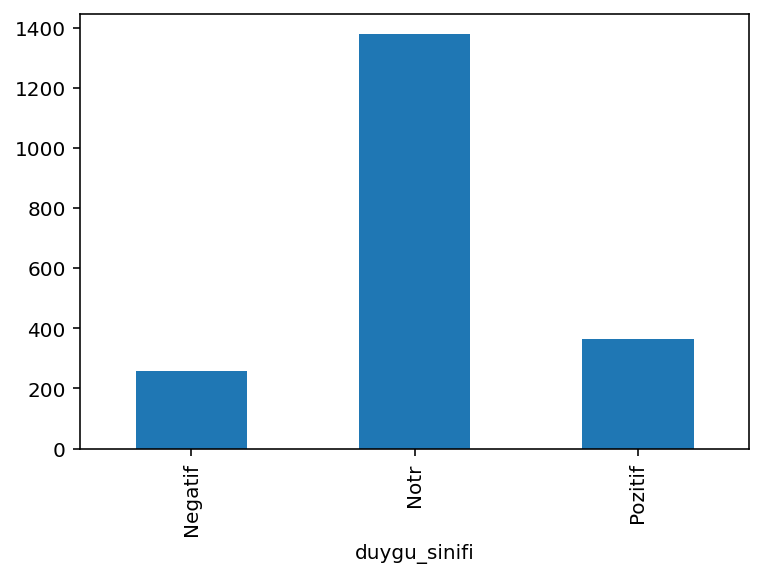

In [92]:
duygu_freq.plot.bar(x = "duygu_sinifi",y = "tweet_id");

In [ ]:
tweetler = api.search(q = "#apple", lang = "en")

In [ ]:
df = hashtag_df(tweetler)

In [94]:
#buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]','')

#sayılar
df['text'] = df['text'].str.replace('\d','')

#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
from textblob import Word
#nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#noktalama işaretleri
df['text'] = df['text'].str.replace('rt','')

In [95]:
sentiment_skorla(df)

,tweet_id,text,favorite_count,retweet_count,created_at,tweet_saati,gunler,sentiment_skoru,duygu_sinifi
0,1302597759438995456,trav_roebuck shouldnt hard general john frewen...,0,0,2020-09-06 13:21:21+00:00,13,Sunday,-0.120833,Negatif
1,1302597758432337920,alzhacker httpstcoezsptmda cdccovidの医療従事者の近くがc...,0,13,2020-09-06 13:21:21+00:00,13,Sunday,0.000000,Notr
2,1302597758382231553,karluskap world bank record covid test kit exp...,0,621,2020-09-06 13:21:21+00:00,13,Sunday,0.000000,Notr
3,1302597757694357505,facesofcovid keith brown charleston south caro...,0,118,2020-09-06 13:21:21+00:00,13,Sunday,-0.500000,Negatif
4,1302597757413330946,doctormacias ahora que hay covid será de gran ...,0,431,2020-09-06 13:21:21+00:00,13,Sunday,0.000000,Notr
...,...,...,...,...,...,...,...,...,...
1995,1302596718475776000,oregonian video claimed show antifa war camp p...,0,194,2020-09-06 13:17:13+00:00,13,Sunday,0.000000,Notr
1996,1302596717204840448,jakpost jakaa cemetery space run covid burial ...,0,58,2020-09-06 13:17:13+00:00,13,Sunday,0.000000,Notr
1997,1302596717163040769,dondekojo president wedding pay aso villa covi...,0,814,2020-09-06 13:17:13+00:00,13,Sunday,0.000000,Notr
1998,1302596716500332545,_realanna annietangent nycschools check suny o...,0,0,2020-09-06 13:17:12+00:00,13,Sunday,0.000000,Notr


In [96]:
duygu_freq = df.groupby("duygu_sinifi").count()["tweet_id"]

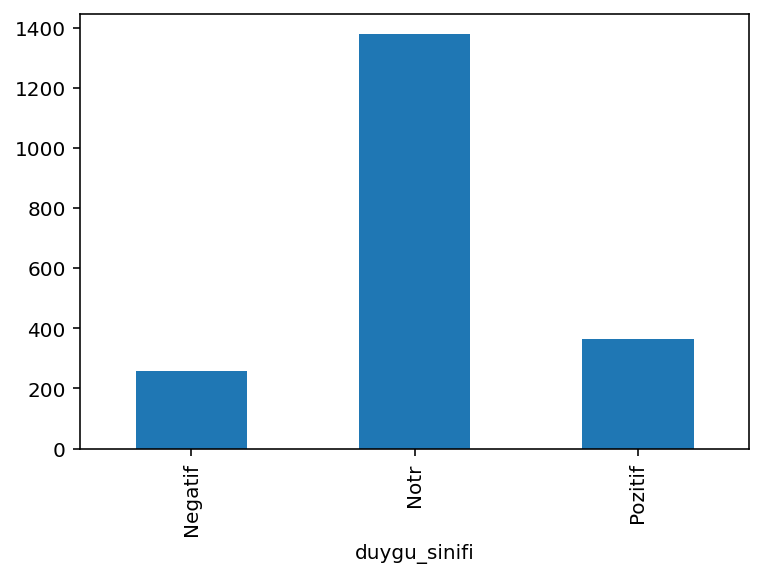

In [97]:
duygu_freq.plot.bar(x = "duygu_sinifi",y = "tweet_id");